# Predizione del prezzo delle auto


**Montanari Simone | 0000881267 |** `simone.montanari14@studio.unibo.it`

**Programmazione di Applicazioni Data Intensive**  
Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena


Citazioni:
* A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012. 
https://archive.ics.uci.edu/ml/datasets/Energy+efficiency


## Descrizione del Problema

In questo progetto si vuole realizzare un modello in grado di predire il carico di riscaldamento e di raffreddamento di edifici, analizzando diverse caratteristiche strutturali. 

## Caricamento delle librerie

Inizio importando le librerie esterne che saranno utili per lo svolgimento del progetto:

In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sb
import os.path
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
%matplotlib inline

## Caricamento del set di dati

Inizio scaricando il file dalla repo github se non esiste già nella cartella dove è presente il file jupyter.

In [321]:
if not os.path.exists("ENB2012_data.csv"):
    urlretrieve("https://raw.githubusercontent.com/Zimon99/Progetto_Data_Intensive/main/ENB2012_data.csv", "ENB2012_data.csv")

Continuo leggendo il file csv tramite il comando *read_csv* di pandas.

In [322]:
data = pd.read_csv("ENB2012_data.csv")

Visualizziamo una parte (le prime 5 righe) del nostro dataset.

In [323]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


Noto la presenza di due colonne prive di significato, quindi le elimino.

In [324]:
data.drop(["Unnamed: 10","Unnamed: 11"], axis= 1, inplace=True)

Controllo la riuscita dell'operazione stampando come fatto precedentemente.

In [325]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


## Preprocessing del dataset

Inizio la fase di preprocessing inserendo manualmente i nomi delle colonne visto che quelli originali non sono comprensibili.

In [326]:
data.columns = "COM SUP AP AT ALT OR AV DAV CRI CRA".split()

data

,COM,SUP,AP,AT,ALT,OR,AV,DAV,CRI,CRA
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
1291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Successivamente verranno spiegati i significati delle colonne.\
Ora proseguiamo controllando la presenza di valori NaN.

In [327]:
data.isna().sum()

COM    528
SUP    528
AP     528
AT     528
ALT    528
OR     528
AV     528
DAV    528
CRI    528
CRA    528
dtype: int64

Noto la presenza di 528 righe dove per ogni colonna è presente un valore NaN, procedo ad eliminarle.

In [328]:
data.dropna(inplace=True)

Controllo la riuscita dell'operazione.

In [329]:
data.isna().sum()

COM    0
SUP    0
AP     0
AT     0
ALT    0
OR     0
AV     0
DAV    0
CRI    0
CRA    0
dtype: int64

Proseguo analizzando informazioni sulle variabili del dataset.

In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   COM     768 non-null    float64
 1   SUP     768 non-null    float64
 2   AP      768 non-null    float64
 3   AT      768 non-null    float64
 4   ALT     768 non-null    float64
 5   OR      768 non-null    float64
 6   AV      768 non-null    float64
 7   DAV     768 non-null    float64
 8   CRI     768 non-null    float64
 9   CRA     768 non-null    float64
dtypes: float64(10)
memory usage: 66.0 KB


Noto che tutti i dati a disposizione sono di tipo nominale, perciò non adotterò la tecnica del *one hot encoding* per trattare i dati categorici.

Per concludere la fase di preprocessing creo un'indice univoco per identificare ogni riga del nostro dataset.

In [331]:
data.insert(0, 'ID', range(len(data)))

Setto l'indice del dataset.

In [332]:
data.set_index("ID", inplace=True)

E mostro una parte di dati per verificare il funzionamento delle operazioni svolte sopra.

In [333]:
data.head()

,COM,SUP,AP,AT,ALT,OR,AV,DAV,CRI,CRA
ID,,,,,,,,,,
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


A questo punto dispongo di un numero sufficiente di istanze (768) per proseguire l'analisi.

## Comprensione delle feature

Le colonne del set di dati hanno i seguenti significati:
- **ID**: ID univoco assegnato manualmente
- **COM**: Compattezza relativa
- **SUP**: Area superficiale
- **AP**: Area della parete
- **AT**: Area del tetto
- **ALT**: Altezza totale
- **OR**: Orientamento
- **AV**: Area vetrata
- **DAV**: Distribuzione dell'area vetrata

Variabili da predire:
- **CRI**: Carico di riscaldamento dell'edificio
- **CRA**: Carico di raffreddamento dell'edificio

## Esplorazione delle feature

Ora che il set di dati è stato caricato e modificato correttamente procedo con l'esplorazione delle singole feature tramite il comando *describe* che fornisce, per ogni colonna, informazioni come il conteggio degli elementi, il valori minimo e massimo, la media e la deviazione standard, i percentili di distribuzione.

In [334]:
data.describe()

,COM,SUP,AP,AT,ALT,OR,AV,DAV,CRI,CRA
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Dall'output del comando noto che:
* Sono presenti edifici sia con che senza vetrate
* Di conseguenza negli edifici senza vetrate la distribuzione di esse avrà valore 0
* Il valore minimo di carico di riscaldamento è 6.01 e il massimo 43.1
* Il valore minimo di carico di raffreddamento è 10.09 e il massimo 48.03

Di seguito sono riportati grafici dove vengono mostrati i conteggi delle feature più rilevanti per capire come sono distribuiti i dati del dataset.

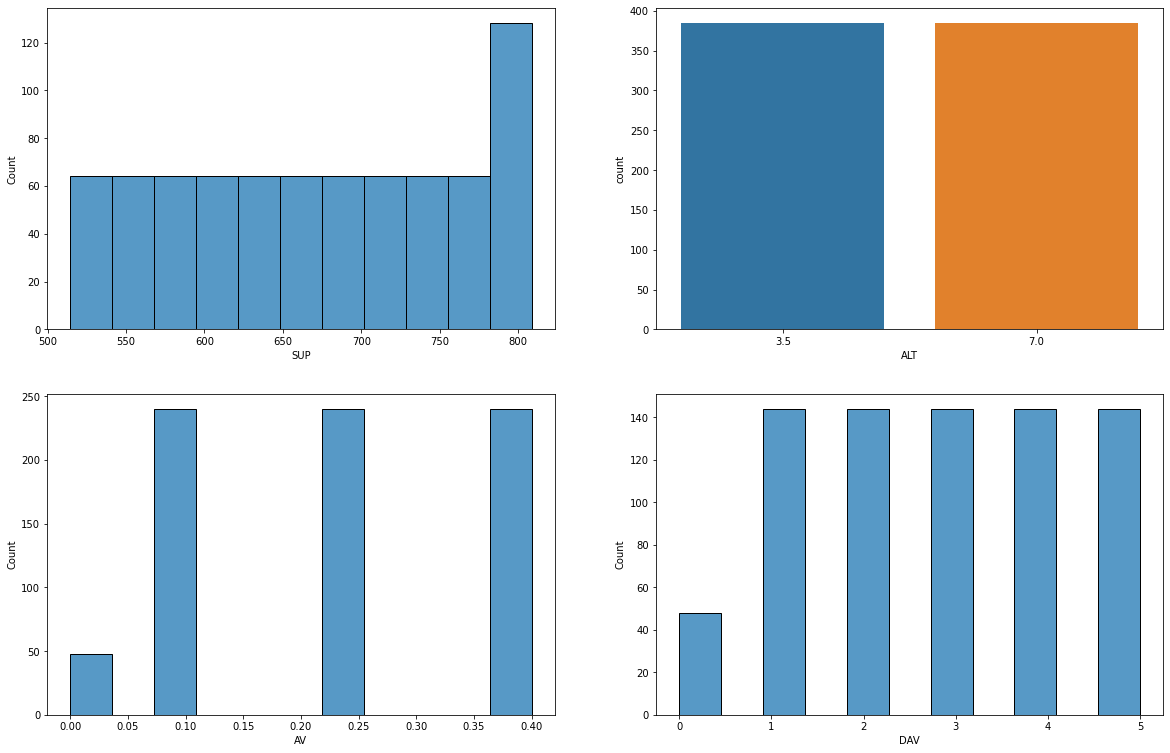

In [335]:
plt.figure(figsize=(20,13))

plt.subplot(2,2,1)
sb.histplot(x="SUP", data=data);

plt.subplot(2,2,2)
sb.countplot(x="ALT", data=data);

plt.subplot(2,2,3)
sb.histplot(x="AV", data=data);

plt.subplot(2,2,4)
sb.histplot(x="DAV", data=data);

Da questi istogrammi deduco che:
* L'area superficiale è ben distribuita tra i dati a disposizione
* Disponiamo di 2 classi di altezza perfettamente bilanciate
* Anche le aree vetrate e le loro distribuzioni sono ben diffuse nel dataset

## Esplorazione relazioni tra feature e variabili da predire

Definisco una funzione che data una colonna del dataset ritorna la media raggruppando per la colonna selezionata.

In [336]:
warnings.filterwarnings("ignore")

def groupby_mean(colonna):
    x = data.groupby(colonna)
    return x["CRI", "CRA"].mean()

Inizio analizzando le due variabili da predire (Carico di riscaldamento e di raffreddamento).

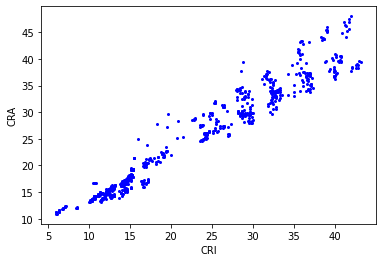

In [337]:
data.plot.scatter("CRI", "CRA", s=4, c="blue");

Dal grafico si nota che l'andamento è proporzionale, infatti entrambi aumentano uniformemente.

Provo ora ad analizzare i due carichi in funzione delle feature.

Parto analizzando la colonna relativa alla compattezza dell'edificio per poi procedere con le altre colonne.

In [338]:
groupby_mean("COM") 

,CRI,CRA
COM,,
0.62,14.283281,15.244063
0.64,16.615313,20.227188
0.66,12.816719,15.869844
0.69,12.388906,15.242188
0.71,12.040156,15.035469
0.74,11.886719,14.809844
0.76,35.664219,36.407188
0.79,38.607969,40.239375
0.82,25.555313,28.028125


In [339]:
groupby_mean("SUP") 

,CRI,CRA
SUP,,
514.5,27.646250,29.217031
563.5,31.628906,33.820781
588.0,28.552656,30.912031
612.5,25.555313,28.028125
637.0,38.607969,40.239375
661.5,35.664219,36.407188
686.0,11.886719,14.809844
710.5,12.040156,15.035469
735.0,12.388906,15.242188


In [340]:
groupby_mean("AP") 

,CRI,CRA
AP,,
245.0,11.886719,14.809844
269.5,12.040156,15.035469
294.0,22.862604,25.123750
318.5,23.333646,25.906250
343.0,27.611641,30.233281
367.5,14.283281,15.244063
416.5,35.664219,36.407188


In [341]:
groupby_mean("ALT") 

,CRI,CRA
ALT,,
3.5,13.338516,16.071432
7.0,31.275885,33.104089


In [342]:
groupby_mean("AV") 

,CRI,CRA
AV,,
0.00,14.286458,19.706250
0.10,20.357167,22.935542
0.25,22.756917,24.892625
0.40,25.411667,26.911417


In [343]:
groupby_mean("DAV") 

,CRI,CRA
DAV,,
0.0,14.286458,19.706250
1.0,23.026111,25.179514
2.0,22.934444,24.996875
3.0,22.681458,24.659444
4.0,22.886667,25.015139
5.0,22.680903,24.715000


Da questi raggruppamenti noto che aumentando la compattezza relativa, la superficie, l'area della parete, l'altezza, l'area vetrata e la distribuzione dell'area vetrata aumentano anche il carico di riscaldamento e quello di raffreddamento.

Ora invece analizzo la colonna relativa all'orientazione e all'area del tetto.

In [344]:
groupby_mean("OR") 

,CRI,CRA
OR,,
2.0,22.312865,24.604531
3.0,22.380677,24.312552
4.0,22.259896,24.480312
5.0,22.275365,24.953646


Salta subito all'occhio che l'orientazione dell'edificio non influisce minimamente sui due carichi.

In [345]:
groupby_mean("AT") 

,CRI,CRA
AT,,
110.25,27.646250,29.217031
122.50,33.646563,35.113984
147.00,30.905313,33.059844
220.50,13.338516,16.071432


Da questo raggruppamento invece noto che con l'aumentare dell'altezza dell'edificio i due carichi diminuiscono di intensità.

## Inizio delle predizioni

Ovviamente essendoci due carichi prima predirò quello di riscaldamento poi quello di raffreddamento.\
Inizio dichiarando qualche funzione utile per evitare di ripetere tante righe di codice due volte.

In [346]:
def regressione_lineare(X, y, X_val):
    
    mod = LinearRegression()
    mod.fit(X, y)
    
    return mod, mod.predict(X_val)

In [347]:
def regressione_polinomiale(X, y, X_val):
    
    mod = Pipeline([
        ("polinomiale", PolynomialFeatures(degree=2, include_bias=False)),
        ("lineare", LinearRegression())
    ])
    
    mod.fit(X, y)
    
    return mod, mod.predict(X_val)

In [348]:
def regressione_polinomiale_gridsearch(X, y):
    
    pip = Pipeline(steps=[
        ("polinomiale", PolynomialFeatures(include_bias=False)),
        ("lineare", LinearRegression())
    ])
    
    mod = GridSearchCV(
        estimator=pip,
        param_grid={'polinomiale__degree': list(range(3,11))},
        scoring='r2',
    )
    
    mod.fit(X, y)
    
    return mod

In [349]:
def regressione_ridge(X, y):
    
    mod = Ridge()
    param = {'alpha': range(1,20)}
    reg = GridSearchCV(mod, param, scoring='r2')
    reg.fit(X_train, y_train)
    
    return reg

In [350]:
def MSE(preds, y_val):
    return np.mean((preds - y_val)**2)

In [351]:
def errore_rel(preds, y_val):
    return np.mean(np.abs(preds-y_val)/y_val)

Passo ora all'effettiva divisione dei dati in training e validation set.

In [352]:
X = data.drop(columns=['CRI', 'CRA'])
y = data['CRI']

X_train,X_val,y_train,y_val = train_test_split(X, y, train_size=0.7)

Definisco qualche funzione per poter stampare gli errori in maniera comoda ed efficiente.

In [353]:
def stampa_errori(mod, X_train, X_val, y_train, y_val, preds):
    
    print("                                 MSE: {:.5}".format(MSE(preds, y_val)))
    print("                     Errore relativo: {:.4%}".format(errore_rel(preds, y_val)))
    print("Coefficiente R quadro validation set: {:.5}".format(mod.score(X_val, y_val)))

## Predizione del carico di riscaldamento con vari modelli

Inizio utilizzando un modello di regressione lineare.\
Per ogni regressione utilizzata appendo il coefficiente R quadro in una lista che servirà per visualizzare l'accuratezza dei modelli nelle conclusioni.\
Inizializzo due liste, una per il carico di riscaldamento e una per quello di raffreddamento.

In [354]:
R_CRI = []
R_CRA = []

In [355]:
mod, preds = regressione_lineare(X_train, y_train, X_val)

stampa_errori(mod, X_train, X_val, y_train, y_val, preds)

R_CRI.append(mod.score(X_val, y_val))

                                 MSE: 8.3788
                     Errore relativo: 9.7061%
Coefficiente R quadro validation set: 0.91112


Ottengo un ottimo risultato per quanto riguarda il coefficiente R quadro, mentre trovo un errore relativo e un MSE piuttosto alti.

Provo ora con una regressione polinomiale di grado 2.

In [356]:
mod, preds = regressione_polinomiale(X_train, y_train, X_val)

stampa_errori(mod, X_train, X_val, y_train, y_val, preds)

R_CRI.append(mod.score(X_val, y_val))

                                 MSE: 0.62644
                     Errore relativo: 2.9821%
Coefficiente R quadro validation set: 0.99336


Si nota subito che l'R quadro ottenuto è al limite della perfezione (0.99), inoltre anche l'MSE e l'errore relativo risultano ottimi valori.

Provo ora a migliorare ulteriormente il nostro modello utilizzando polinomi di grado maggiore di quello che è stato usato in precedenza (grado 2).
Per farlo utilizzo la GridSearchCV cercando il risultato migliore con i gradi dei polinomi tra 3 e 10.

In [357]:
mod = regressione_polinomiale_gridsearch(X_train, y_train)

print("Miglior grado trovato: {}".format(mod.best_params_["polinomiale__degree"]))
print("Coefficiente R quadro: {:.5}".format(mod.score(X_val, y_val)))

R_CRI_GD = mod.best_params_["polinomiale__degree"]
R_CRI.append(mod.score(X_val, y_val))

Miglior grado trovato: 3
Coefficiente R quadro: 0.99623


Ottengo il miglior risultato con un polinomio di terzo grado e con un R quadro ancora migliore rispetto alla regressione polinomiale di secondo grado.

Provo ora ad addestrare un modello Ridge facendo variare alpha da 1 a 10 con la GridSearchCV.

In [358]:
mod = regressione_ridge(X_train, y_train)

print("Miglior alpha trovato: {}".format(mod.best_params_['alpha']))
print("Coefficiente R quadro: {:.5}".format(mod.score(X_val, y_val)))

R_CRI.append(mod.score(X_val, y_val))

Miglior alpha trovato: 1
Coefficiente R quadro: 0.90769


Noto che la miglior configurazione di regressione Ridge avviene con alpha = 1 e addestra un modello caratterizzato da un buon R quadro.\
Pur essendo un ottimo risultato (pari a quello della regressione lineare) è inferiore a quello trovato con un modello di regressione polinomiale di grado 4.

## Predizione del carico di raffreddamento con vari modelli

Ripeto le stesse prove con gli stessi modelli che ho utilizzato per il carico di riscaldamento.
Ovviamente cambio le variabili X e y utilizzate prima impostando *CRA* come variabile da predire.

In [359]:
X = data.drop(columns=['CRI', 'CRA'])
y = data['CRA']

X_train,X_val,y_train,y_val = train_test_split(X, y, train_size=0.7)

Inizio con la regressione lineare.

In [360]:
mod, preds = regressione_lineare(X_train, y_train, X_val)

stampa_errori(mod, X_train, X_val, y_train, y_val, preds)

R_CRA.append(mod.score(X_val, y_val))

                                 MSE: 12.323
                     Errore relativo: 9.2747%
Coefficiente R quadro validation set: 0.8662


Similmente a prima ottengo un buon R quadro mentre l'errore relativo e l'MSE sono piuttosto alti.

Continuiamo addestro un modello di regressione polinomiale di grado 2.

In [361]:
mod, preds = regressione_polinomiale(X_train, y_train, X_val)

stampa_errori(mod, X_train, X_val, y_train, y_val, preds)

R_CRA.append(mod.score(X_val, y_val))

                                 MSE: 3.3622
                     Errore relativo: 4.2759%
Coefficiente R quadro validation set: 0.96349


Come prima con la regressione polinomiale di grado 2 ottengo un eccellente R quadro e un ottimo errore relativo, analizzando l'MSE noto una differenza rispetto a prima, infatti abbiamo trovato un valore mediamente alto.

Procedo provando altri gradi (da 3 a 10) di regressione polinomiale utilizzando GridSearchCV.

In [362]:
mod = regressione_polinomiale_gridsearch(X_train, y_train)

print("Miglior grado trovato: {}".format(mod.best_params_["polinomiale__degree"]))
print("Coefficiente R quadro: {:.5}".format(mod.score(X_val, y_val)))

R_CRA_GD = mod.best_params_["polinomiale__degree"]
R_CRA.append(mod.score(X_val, y_val))

Miglior grado trovato: 3
Coefficiente R quadro: 0.96572


Come per il carico di riscaldamento il miglior grado trovato è 3 e anche l'R quadro è un buon risultato.

Procedo ora con la regressione Ridge.

In [363]:
mod = regressione_ridge(X_train, y_train)

print("Miglior alpha trovato: {}".format(mod.best_params_['alpha']))
print("Coefficiente R quadro: {:.5}".format(mod.score(X_val, y_val)))

R_CRA.append(mod.score(X_val, y_val))

Miglior alpha trovato: 1
Coefficiente R quadro: 0.86079


Rispetto al risultato ottenuto precedentemente questo è leggermente peggio, l'alpha migliore rimane 1.

## Conclusione

In [364]:
print("Coefficiente R quadro carico di riscaldamento (CRI):")
print("            Regressione Lineare: {:.5}".format(R_CRI[0]))
print("Regressione Polinomiale grado 2: {:.5}".format(R_CRI[1]))
print("Regressione Polinomiale grado " + str(R_CRI_GD) + ": {:.5}".format(R_CRI[2]))
print("              Regressione Ridge: {:.5}".format(R_CRI[3]))
print("")
print("Coefficiente R quadro carico di raffreddamento (CRA):")
print("            Regressione Lineare: {:.5}".format(R_CRA[0]))
print("Regressione Polinomiale grado 2: {:.5}".format(R_CRA[1]))
print("Regressione Polinomiale grado " + str(R_CRA_GD) + ": {:.5}".format(R_CRA[2]))
print("              Regressione Ridge: {:.5}".format(R_CRA[3]))

Coefficiente R quadro carico di riscaldamento (CRI):
            Regressione Lineare: 0.91112
Regressione Polinomiale grado 2: 0.99336
Regressione Polinomiale grado 3: 0.99623
              Regressione Ridge: 0.90769

Coefficiente R quadro carico di raffreddamento (CRA):
            Regressione Lineare: 0.8662
Regressione Polinomiale grado 2: 0.96349
Regressione Polinomiale grado 3: 0.96572
              Regressione Ridge: 0.86079


Parto osservando che tutti e 4 i modelli risultano avere un'ottima accuratezza.\
In entrambi i carichi il modello più preciso risulta quello con regressione polinomiale di grado 3.

Se dovessi scegliere il modello migliore farei prima una considerazione; se la complessità dei dati dovesse rimanere quella che è allora converrebbe utilizzare il modello con regressione polinomiale di grado 2 per entrambi (non il grado 3  in quanto la differenza è veramente minima e per un discorso di complessità computazionale sceglierei quello di grado 2).
Mentre se la complessità dei dati in un futuro si dovesse incrementare allora converrebbe utilizzare il modello con regressione ridge in quanto la sua accuratezza rimarrebbe comunque ottima.